##Projet

In [1]:
#Importation
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import Traitement as tr
import os
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from Graph import Graph


In [2]:
#Lesture des données
data = pd.read_csv('data.csv', sep=';')
data.head(5)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,OECD,QGDP,TOT,PC_CHGPP,A,1962,5.696916,NaN
1,OECD,QGDP,TOT,PC_CHGPP,A,1963,5.175455,NaN
2,OECD,QGDP,TOT,PC_CHGPP,A,1964,6.361377,NaN
3,OECD,QGDP,TOT,PC_CHGPP,A,1965,5.364164,NaN
4,OECD,QGDP,TOT,PC_CHGPP,A,1966,5.733038,NaN


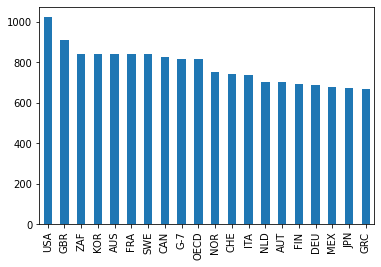

In [3]:
#Rapide visualisation pour voir qu'elle pays a le plus de data point
pays = pd.Series(data["LOCATION"].value_counts().head(20))
image = pays.plot(kind='bar')

Nous constatons qu'il n'y a pas le même nombre de data points par pays.
Dans un premier temps nous allons étudier les données de la France

In [4]:
#Jetons un coup d'yeux sur les données de la france
df_fra = data[data['LOCATION'] == "FRA"]
df_fra.head(3)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
5096,FRA,QGDP,TOT,PC_CHGPY,Q,1961-Q1,3.971438,E
5097,FRA,QGDP,TOT,PC_CHGPY,Q,1961-Q2,5.239927,E
5098,FRA,QGDP,TOT,PC_CHGPY,Q,1961-Q3,6.121195,E


In [5]:
#Nous étudions les variables du dataset
print(df_fra['FREQUENCY'].value_counts())
print(df_fra['MEASURE'].value_counts())
print(df_fra['SUBJECT'].value_counts())
print(df_fra['INDICATOR'].value_counts())

Q    721
A    119
Name: FREQUENCY, dtype: int64
IDX         302
PC_CHGPP    300
PC_CHGPY    238
Name: MEASURE, dtype: int64
TOT       538
VOLIDX    302
Name: SUBJECT, dtype: int64
QGDP    840
Name: INDICATOR, dtype: int64


MEASURE :
PC_CHGPP signifie pourcentage de variation période précédente, uniquement disponible pour TOT. \n
PC_CHGPY signifie pourcentage de variation même période année précédente, uniquement disponible pour TOT.
IDX indice, uniquement disponible pour SUBJECT = VOLIDX.


SUBJECT:

TOT signifie Total.
VOLIDX signifie indice de volume.

Lien d'un excel récapitulatif :
https://loicvieu-drive.mycozy.cloud/public?sharecode=JCVlMBO0XjQX


In [6]:
dataFR = data[data['LOCATION'] == 'FRA']
gpy, gpp, ind = tr.traitementParPays(dataFR, 'A')
# tr.mobilMoy(gpp,4)

Nous étudions des séries chronologiques. Pour voir si les données passées ont une incidence sur celle
présente nous réalisons un graphique de retard. Les graphiques de retards si dessous nous montre les relations
entre les données en t / t-1 et t / t-2

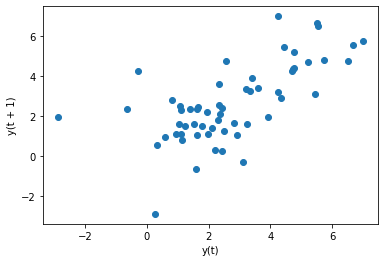

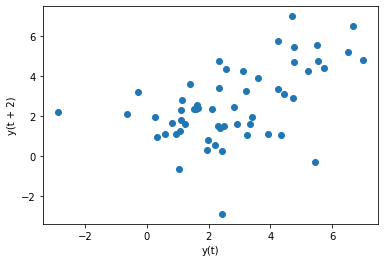

In [7]:
#Nous utilisons la méthode de pandas lag_plot pour les afficher.
#pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.lag_plot.html
lag_plot(gpp['Value'],lag=1)
plt.show()

a = lag_plot(gpp['Value'],lag=2)
plt.show()

A vu d'oeil nous constatons que les données semblent être corrélée. Nous continuons notre analyse.
Nous calculons le coefficient de corrélation entre les données en t et en t+1

            t       t+1
t    1.000000  0.662071
t+1  0.662071  1.000000


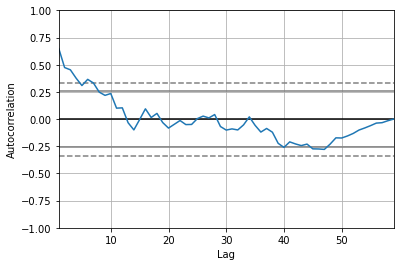

In [8]:
#Calcule corrélation de pearson
donnee = []
for µ in range(len(gpp['Value'])-1):
    donnee.append([gpp.iloc[µ]['Value'],gpp.iloc[µ+1]['Value']])
print(pd.DataFrame(donnee,columns=['t','t+1']).corr('pearson'))

#Par la suite nous pouvons faire le graphique d'auto-corr
autocorrelation_plot(gpp['Value'])
plt.show()

Nous avons un coefficient de corrélation de Pearson > 0,5, ce qui démontre une corrélation élévée pour un retard 1

Nous étudions des données temporelle. Nous allons étudier si les trimestres on une influance.
Ces a dire si il y a une composantes saisonnières.

In [9]:
#Nous récupérons les données de chaque années pour les 4 trimestres
dataTrim = tr.saisonier(dataFR)
#Nous affichons les statistique général
dataTrim.describe()

,ValeurQ1,ValeurQ2,ValeurQ3,ValeurQ4
count,59.000000,59.000000,59.000000,59.000000
mean,0.676929,0.577484,0.822542,0.586085
std,0.769279,1.350164,1.510368,0.627369
min,-1.665799,-7.580956,-0.312951,-1.510183
25%,0.263990,0.184265,0.286293,0.227723
50%,0.678052,0.631128,0.512995,0.653064
75%,1.033142,1.072126,0.944417,0.925338
max,2.909618,4.465475,11.373243,1.699022


<AxesSubplot:>

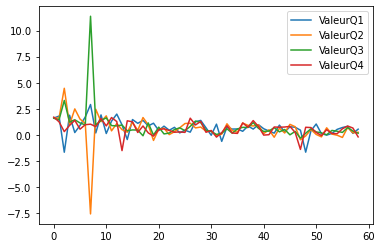

In [10]:
#nous réalisons un graphique
dataTrim.plot()

Sur le graphique nous ne constatons pas de composantes saisonnières.
Nous ponvons donc commencer l'estimation des modèles

In [12]:
g = Graph(data)

list_dates = g.get_list_dates_q(1961, 1980)#Dates pour lesquelles nous souhaitons afficher les données
df_fra_usa = g.filter_df(['FRA', 'USA'], 'Q', 'TOT', 'PC_CHGPY', list_dates)#Filtrage du df principal en fonction des éléments désirés

g.line_graph(df_fra_usa, x='TIME', y='Value', x_label="Trimestre", y_label="Croissance du PIB (%)", title='Evolution du pib')#Création des courbes
g.display()


In [13]:
g.display_correlation_heatmap()